## Adaboost Model on Dataset with Bets

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from importlib import reload


D:\Users\karel\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [82]:
data = pd.read_csv('Data_Structures/FINAL_BASE_DATASET_WITH_BETS.csv',index_col=0)

In [83]:

X_data=data.drop(['Label'],axis=1)
Y_data=data['Label']

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2, random_state=0)
for train_index, test_index in s.split(X_data, Y_data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b, X_test_b = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_b, y_test_b = Y_data.iloc[train_index], Y_data.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b.shape[0]))
print ("Testing set has {} samples.".format(X_test_b.shape[0]))

Training set has 12613 samples.
Testing set has 3154 samples.


In [6]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner = learner.fit(X_train, y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])    
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = f1_score(y_train[:300], predictions_train,
                                     average='micro')
    # Compute F-score on the test set which is y_test
    results['f_test'] = f1_score(y_test, predictions_test, 
                                    average='micro')  
    # Success
    print ("{} trained.".format(learner.__class__.__name__))
        
    # Return the results
    return results

In [84]:
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

In [85]:
results = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)

AdaBoostClassifier trained.


In [86]:
results

{'acc_test': 0.53424223208623967,
 'acc_train': 0.62666666666666671,
 'f_test': 0.53424223208623967,
 'f_train': 0.62666666666666671,
 'train_time': 38.7236602306366}

In [87]:
import itertools

******************************************************************
Confusion matrix for AdaBoost classifier
Normalized confusion matrix
[[ 0.49  0.14  0.37]
 [ 0.25  0.18  0.58]
 [ 0.14  0.1   0.76]]


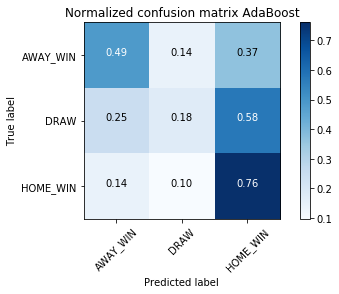

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

LABELS = ['HOME_WIN', 'AWAY_WIN', 'DRAW']
le.fit(LABELS)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred = clf.predict(X_test_b)
cnf_matrix_adaboost = confusion_matrix(y_test_b, y_pred)
np.set_printoptions(precision=2)


CLASSES_NAME = le.inverse_transform([0,1,2])

print ("******************************************************************")
print ("Confusion matrix for AdaBoost classifier")
plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix AdaBoost')
plt.show()


### Hyperparameter tuning


In [89]:
#from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

# Initialize the classifier
clf = AdaBoostClassifier()


'''
MY BASE CLASSIFIER
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)
                         
'''
parameters = {'base_estimator': [tree.DecisionTreeClassifier(max_depth=1),
                                tree.DecisionTreeClassifier(max_depth=2)], 
              'n_estimators': [1000], 
              'algorithm' : ['SAMME', 'SAMME.R'],
              'random_state' : [1]}

# Make an fbeta_score scoring object using make_scorer()
#scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()

grid_obj = GridSearchCV(clf, parameters, scoring = "accuracy", verbose = 5)

#Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_b, y_train_b)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 
[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5412604042806183, total=  26.6s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.0s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5434007134363853, total=  25.8s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   53.3s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5255769688317868, total=  25.1s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5348394768133174, total=  48.0s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.1min remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5395957193816885, total=  48.3s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 
[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
        

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  7.6min finished


In [90]:
## Unoptimized Model
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

# Get the estimator
best_clf = grid_fit.best_estimator_
print (best_clf)

# Make predictions using the unoptimized and model
print ("Unoptimized model\n------")
results = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)
print(results)
print ("\nOptimized Model\n------")
results = train_predict(best_clf, X_train_b, y_train_b, X_test_b, y_test_b)
print(results)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=1)
Unoptimized model
------
AdaBoostClassifier trained.
{'train_time': 38.96136498451233, 'acc_train': 0.62666666666666671, 'acc_test': 0.53424223208623967, 'f_train': 0.62666666666666671, 'f_test': 0.53424223208623967}

Optimized Model
------
AdaBoostClassifier trained.
{'train_time': 37.22106051445007, 'acc_train': 0.56666666666666665, 'acc_test': 0.53931515535827523, 'f_train': 0.56666666666666665, 'f_test': 0.53931515535827523}


## Some observations 

In [91]:
from collections import Counter
c=Counter(Y_data)

print ("Home_Win Percentage :", c[2]/Y_data.shape[0]*100)
print ("Away_Win Percentage :", c[1]/Y_data.shape[0]*100)
print ("Draw Percentage :", c[0]/Y_data.shape[0]*100)


Home_Win Percentage : 46.01382634616604
Away_Win Percentage : 25.331388342741167
Draw Percentage : 28.65478531109279


******************************************************************
Confusion matrix for AdaBoost classifier
Normalized confusion matrix
[[ 0.53  0.04  0.43]
 [ 0.29  0.05  0.66]
 [ 0.16  0.03  0.82]]


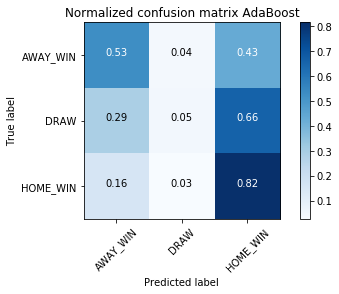

In [92]:
'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred = best_clf.predict(X_test_b)
cnf_matrix_adaboost = confusion_matrix(y_test_b, y_pred)
np.set_printoptions(precision=2)


CLASSES_NAME = le.inverse_transform([0,1,2])

print ("******************************************************************")
print ("Confusion matrix for AdaBoost classifier")
plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix AdaBoost')
plt.show()


#### Home Wins
Based on the confusion matrix for the best classifier, it is pretty good at predicting home wins. Through statistics, home wins occur 46% of the time; so predicting 82% is really good.

#### Away Wins
Away wins statistically occur 25% of the time, the model predicts the correct result for an away win 53% of the time.

#### Draw
Draws occur 28% of the time, the model predicts the correct result for a draw only 5%. We can see that the model is bad at predicting draws

### Let's do some more tuning

In [93]:
clf

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=1)

In [94]:

param_test1 = {
    'algorithm': ['SAMME.R','SAMME']
}
gsearch1 = GridSearchCV(estimator = clf, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.51122, std: 0.00428, params: {'algorithm': 'SAMME.R'},
  mean: 0.53675, std: 0.00795, params: {'algorithm': 'SAMME'}],
 {'algorithm': 'SAMME'},
 0.53674602884959677)

In [95]:
clf_1 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1000, random_state = 1)
param_test1 = {
    'base_estimator': [tree.DecisionTreeClassifier(max_depth=x) for x in range(1,5)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53675, std: 0.00795, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')},
  mean: 0.53532, std: 0.00331, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')},
  mean: 0.52271, std: 0.00459, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
   

In [96]:

param_test1 = {
    'learning_rate': [i/1000.0 for i in range(1,50,5)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53587, std: 0.00950, params: {'learning_rate': 0.001},
  mean: 0.53833, std: 0.00701, params: {'learning_rate': 0.006},
  mean: 0.54222, std: 0.00706, params: {'learning_rate': 0.011},
  mean: 0.54230, std: 0.00711, params: {'learning_rate': 0.016},
  mean: 0.54198, std: 0.00689, params: {'learning_rate': 0.021},
  mean: 0.54127, std: 0.00639, params: {'learning_rate': 0.026},
  mean: 0.54158, std: 0.00661, params: {'learning_rate': 0.031},
  mean: 0.54111, std: 0.00532, params: {'learning_rate': 0.036},
  mean: 0.54158, std: 0.00529, params: {'learning_rate': 0.041},
  mean: 0.54119, std: 0.00565, params: {'learning_rate': 0.046}],
 {'learning_rate': 0.016},
 0.54229603470106891)

In [97]:

param_test1 = {
    'learning_rate': [i/1000.0 for i in range(16,21)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54230, std: 0.00711, params: {'learning_rate': 0.016},
  mean: 0.54206, std: 0.00695, params: {'learning_rate': 0.017},
  mean: 0.54222, std: 0.00706, params: {'learning_rate': 0.018},
  mean: 0.54198, std: 0.00689, params: {'learning_rate': 0.019},
  mean: 0.54190, std: 0.00683, params: {'learning_rate': 0.02}],
 {'learning_rate': 0.016},
 0.54229603470106891)

In [98]:
clf_2 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1000, random_state = 1,learning_rate=0.016)
param_test1 = {
    'n_estimators': [i for i in range(100,1500,100)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53849, std: 0.00950, params: {'n_estimators': 100},
  mean: 0.53294, std: 0.01215, params: {'n_estimators': 200},
  mean: 0.53817, std: 0.00710, params: {'n_estimators': 300},
  mean: 0.53802, std: 0.00672, params: {'n_estimators': 400},
  mean: 0.54158, std: 0.00665, params: {'n_estimators': 500},
  mean: 0.54230, std: 0.00712, params: {'n_estimators': 600},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 700},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 800},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 900},
  mean: 0.54230, std: 0.00711, params: {'n_estimators': 1000},
  mean: 0.54214, std: 0.00700, params: {'n_estimators': 1100},
  mean: 0.54214, std: 0.00700, params: {'n_estimators': 1200},
  mean: 0.54182, std: 0.00678, params: {'n_estimators': 1300},
  mean: 0.54174, std: 0.00672, params: {'n_estimators': 1400}],
 {'n_estimators': 600},
 0.54229603470106902)

In [99]:

param_test1 = {
    'n_estimators': [i for i in range(600,700,10)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.54230, std: 0.00712, params: {'n_estimators': 600},
  mean: 0.54230, std: 0.00712, params: {'n_estimators': 610},
  mean: 0.54230, std: 0.00712, params: {'n_estimators': 620},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 630},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 640},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 650},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 660},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 670},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 680},
  mean: 0.54222, std: 0.00706, params: {'n_estimators': 690}],
 {'n_estimators': 600},
 0.54229603470106902)

In [102]:
clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=600, random_state = 1,learning_rate=0.016)

results = train_predict(clf_3, X_train_b, y_train_b, X_test_b, y_test_b)

AdaBoostClassifier trained.


In [103]:
results

{'acc_test': 0.54977805960684845,
 'acc_train': 0.56999999999999995,
 'f_test': 0.54977805960684845,
 'f_train': 0.56999999999999995,
 'train_time': 23.1489520072937}

After tuning some parameters, we were able to reach an accuracy of 54.8% on this dataset! Let's try adding the team ratings features and removing the Betting features.

## Adaboost Model on Dataset with Team Ratings and No Bets

In [73]:
data = pd.read_csv('Data_Structures/FINAL_BASE_DATASET_TEAM_RATINGS_ADDED_NO_BETS_ZEROS_NOT_REMOVED.csv',index_col=0)

In [74]:

X_data=data.drop(['Label'],axis=1)
Y_data=data['Label']

s = StratifiedShuffleSplit(n_splits=2, test_size = 0.2, random_state=0)
for train_index, test_index in s.split(X_data, Y_data):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_b, X_test_b = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_b, y_test_b = Y_data.iloc[train_index], Y_data.iloc[test_index]


# Show the results of the split
print ("Training set has {} samples.".format(X_train_b.shape[0]))
print ("Testing set has {} samples.".format(X_test_b.shape[0]))

Training set has 13887 samples.
Testing set has 3472 samples.


In [45]:
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

In [46]:
results = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)

AdaBoostClassifier trained.


In [47]:
results

{'acc_test': 0.52880184331797231,
 'acc_train': 0.57333333333333336,
 'f_test': 0.52880184331797231,
 'f_train': 0.57333333333333336,
 'train_time': 44.221764087677}

******************************************************************
Confusion matrix for AdaBoost classifier
Normalized confusion matrix
[[ 0.46  0.11  0.44]
 [ 0.23  0.16  0.61]
 [ 0.13  0.09  0.78]]


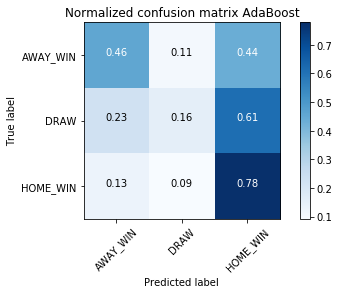

In [48]:
'''
CONFUSIOM MATRIX FOR ADABOOST
'''
y_pred = clf.predict(X_test_b)
cnf_matrix_adaboost = confusion_matrix(y_test_b, y_pred)
np.set_printoptions(precision=2)


CLASSES_NAME = le.inverse_transform([0,1,2])

print ("******************************************************************")
print ("Confusion matrix for AdaBoost classifier")
plt.figure()
plot_confusion_matrix(cnf_matrix_adaboost, classes=CLASSES_NAME, normalize=True,
                      title='Normalized confusion matrix AdaBoost')
plt.show()


In [49]:
# Initialize the classifier
clf = AdaBoostClassifier()


'''
MY BASE CLASSIFIER
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)
                         
'''
parameters = {'base_estimator': [tree.DecisionTreeClassifier(max_depth=1),
                                tree.DecisionTreeClassifier(max_depth=2)], 
              'n_estimators': [1000], 
              'algorithm' : ['SAMME', 'SAMME.R'],
              'random_state' : [1]}

# Make an fbeta_score scoring object using make_scorer()
#scorer = make_scorer(fbeta_score, beta=0.5, average='weighted')

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()

grid_obj = GridSearchCV(clf, parameters, scoring = "accuracy", verbose = 5)

#Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train_b, y_train_b)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 
[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5295896328293737, total=  29.0s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.5s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5222462203023758, total=  28.6s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   58.7s remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5390101577696131, total=  28.2s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.5min remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5205183585313174, total=  54.4s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.4min remaining:    0.0s


[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1, score=0.5287257019438445, total=  54.1s
[CV] algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), n_estimators=1000, random_state=1 
[CV]  algorithm=SAMME, base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
        

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  8.6min finished


In [50]:
## Unoptimized Model
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

# Get the estimator
best_clf = grid_fit.best_estimator_
print (best_clf)

# Make predictions using the unoptimized and model
print ("Unoptimized model\n------")
results = train_predict(clf, X_train_b, y_train_b, X_test_b, y_test_b)
print(results)
print ("\nOptimized Model\n------")
results = train_predict(best_clf, X_train_b, y_train_b, X_test_b, y_test_b)
print(results)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=1)
Unoptimized model
------
AdaBoostClassifier trained.
{'train_time': 43.68955445289612, 'acc_train': 0.57333333333333336, 'acc_test': 0.52880184331797231, 'f_train': 0.57333333333333336, 'f_test': 0.52880184331797231}

Optimized Model
------
AdaBoostClassifier trained.
{'train_time': 42.29925179481506, 'acc_train': 0.53666666666666663, 'acc_test': 0.5429147465437788, 'f_train': 0.53666666666666663, 'f_test': 0.5429147465437788}


### Let's do some more tuning

In [72]:
## Unoptimized Model
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1)

In [75]:

param_test1 = {
    'algorithm': ['SAMME.R','SAMME']
}
gsearch1 = GridSearchCV(estimator = clf, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.50738, std: 0.00178, params: {'algorithm': 'SAMME.R'},
  mean: 0.53028, std: 0.00686, params: {'algorithm': 'SAMME'}],
 {'algorithm': 'SAMME'},
 0.53028200363378752)

In [107]:
clf_1 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1000, random_state = 1)
param_test1 = {
    'base_estimator': [tree.DecisionTreeClassifier(max_depth=x) for x in range(1,5)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53675, std: 0.00795, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')},
  mean: 0.53532, std: 0.00331, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')},
  mean: 0.52271, std: 0.00459, params: {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
   

In [77]:

param_test1 = {
    'learning_rate': [i/1000.0 for i in range(1,50,5)]
}
gsearch1 = GridSearchCV(estimator = clf_1, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.51725, std: 0.00548, params: {'learning_rate': 0.001},
  mean: 0.52783, std: 0.00544, params: {'learning_rate': 0.006},
  mean: 0.52877, std: 0.00613, params: {'learning_rate': 0.011},
  mean: 0.52999, std: 0.00619, params: {'learning_rate': 0.016},
  mean: 0.53057, std: 0.00507, params: {'learning_rate': 0.021},
  mean: 0.53194, std: 0.00570, params: {'learning_rate': 0.026},
  mean: 0.53215, std: 0.00561, params: {'learning_rate': 0.031},
  mean: 0.53223, std: 0.00492, params: {'learning_rate': 0.036},
  mean: 0.53215, std: 0.00544, params: {'learning_rate': 0.041},
  mean: 0.53165, std: 0.00593, params: {'learning_rate': 0.046}],
 {'learning_rate': 0.036},
 0.53222561473232133)

In [78]:
clf_2 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=1000, random_state = 1,learning_rate=0.036)
param_test1 = {
    'n_estimators': [i for i in range(100,1500,100)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52308, std: 0.00639, params: {'n_estimators': 100},
  mean: 0.52884, std: 0.00546, params: {'n_estimators': 200},
  mean: 0.52877, std: 0.00599, params: {'n_estimators': 300},
  mean: 0.52992, std: 0.00590, params: {'n_estimators': 400},
  mean: 0.53028, std: 0.00578, params: {'n_estimators': 500},
  mean: 0.53100, std: 0.00492, params: {'n_estimators': 600},
  mean: 0.53136, std: 0.00561, params: {'n_estimators': 700},
  mean: 0.53244, std: 0.00618, params: {'n_estimators': 800},
  mean: 0.53223, std: 0.00538, params: {'n_estimators': 900},
  mean: 0.53223, std: 0.00492, params: {'n_estimators': 1000},
  mean: 0.53208, std: 0.00508, params: {'n_estimators': 1100},
  mean: 0.53251, std: 0.00553, params: {'n_estimators': 1200},
  mean: 0.53237, std: 0.00536, params: {'n_estimators': 1300},
  mean: 0.53251, std: 0.00513, params: {'n_estimators': 1400}],
 {'n_estimators': 1200},
 0.532513918445634)

In [79]:
param_test1 = {
    'n_estimators': [i for i in range(1200,1300,10)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train_b,y_train_b)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53251, std: 0.00553, params: {'n_estimators': 1200},
  mean: 0.53251, std: 0.00517, params: {'n_estimators': 1210},
  mean: 0.53266, std: 0.00556, params: {'n_estimators': 1220},
  mean: 0.53266, std: 0.00538, params: {'n_estimators': 1230},
  mean: 0.53259, std: 0.00547, params: {'n_estimators': 1240},
  mean: 0.53223, std: 0.00521, params: {'n_estimators': 1250},
  mean: 0.53251, std: 0.00527, params: {'n_estimators': 1260},
  mean: 0.53273, std: 0.00537, params: {'n_estimators': 1270},
  mean: 0.53259, std: 0.00536, params: {'n_estimators': 1280},
  mean: 0.53251, std: 0.00535, params: {'n_estimators': 1290}],
 {'n_estimators': 1270},
 0.53272994784579752)

In [104]:
clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1270, random_state = 1,learning_rate=0.036)

results = train_predict(clf_3, X_train_b, y_train_b, X_test_b, y_test_b)

AdaBoostClassifier trained.


In [105]:
results

{'acc_test': 0.55041217501585293,
 'acc_train': 0.57333333333333336,
 'f_test': 0.55041217501585293,
 'f_train': 0.57333333333333336,
 'train_time': 49.015647411346436}

#### With this dataset and after tuning, we were able to reach an accuracy of 55.04%

## Let's try now taking the latest season (15/16) as test data and the previous seasons as training data and rerun our models! 

### Our aim is to have a model that can predict the outcome of matches in the next season given information from previous seasons

In [3]:
final_dataset=pd.read_csv('FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED_WITH_SEASON.csv')

In [4]:
## Extract season 2015/2016 matches as test data
this_season='2015/2016'
test_data=final_dataset[final_dataset['season']==this_season]
train_data=final_dataset.drop(test_data.index)

X_train=train_data.drop(['season','Label'],axis=1)
Y_train=train_data['Label']

X_test=test_data.drop(['season','Label'],axis=1)
Y_test=test_data['Label']


In [10]:
from collections import Counter
display(Counter(Y_train))
display(Counter(Y_test))

Counter({0: 4199, 1: 3758, 2: 6866})

Counter({0: 773, 1: 654, 2: 1109})

In [7]:
clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1270, random_state = 1,learning_rate=0.036)

results = train_predict(clf_3, X_train, Y_train, X_test, Y_test)

AdaBoostClassifier trained.


In [8]:
results

{'acc_test': 0.48225552050473186,
 'acc_train': 0.56999999999999995,
 'f_test': 0.48225552050473186,
 'f_train': 0.56999999999999995,
 'train_time': 61.934396743774414}

## Let's try tuning!

In [15]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'learning_rate': [i/10000.0 for i in range(1,11)]
}
gsearch1 = GridSearchCV(estimator = clf_3, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0001},
  mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0002},
  mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0003},
  mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0004},
  mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0005},
  mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0006},
  mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0007},
  mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0008},
  mean: 0.52709, std: 0.00660, params: {'learning_rate': 0.0009},
  mean: 0.52830, std: 0.00807, params: {'learning_rate': 0.001}],
 {'learning_rate': 0.001},
 0.52830265103683527)

In [17]:
clf_2 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1,learning_rate=0.001)
param_test1 = {
    'n_estimators': [i for i in range(1400,2000,100)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52999, std: 0.00869, params: {'n_estimators': 1400},
  mean: 0.53329, std: 0.01098, params: {'n_estimators': 1500},
  mean: 0.53383, std: 0.00840, params: {'n_estimators': 1600},
  mean: 0.53147, std: 0.00666, params: {'n_estimators': 1700},
  mean: 0.51798, std: 0.01917, params: {'n_estimators': 1800},
  mean: 0.50375, std: 0.03970, params: {'n_estimators': 1900}],
 {'n_estimators': 1600},
 0.53383347526454328)

In [18]:
param_test1 = {
    'n_estimators': [i for i in range(1600,1700,10)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53383, std: 0.00840, params: {'n_estimators': 1600},
  mean: 0.53417, std: 0.00870, params: {'n_estimators': 1610},
  mean: 0.53417, std: 0.00870, params: {'n_estimators': 1620},
  mean: 0.53431, std: 0.00882, params: {'n_estimators': 1630},
  mean: 0.53289, std: 0.00766, params: {'n_estimators': 1640},
  mean: 0.53289, std: 0.00766, params: {'n_estimators': 1650},
  mean: 0.53289, std: 0.00766, params: {'n_estimators': 1660},
  mean: 0.53201, std: 0.00713, params: {'n_estimators': 1670},
  mean: 0.53208, std: 0.00704, params: {'n_estimators': 1680},
  mean: 0.53201, std: 0.00700, params: {'n_estimators': 1690}],
 {'n_estimators': 1630},
 0.53430561879617688)

In [27]:
clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1630, random_state = 1,learning_rate=0.001)

results = train_predict(clf_3, X_train, Y_train, X_test, Y_test)

AdaBoostClassifier trained.


In [28]:
results

{'acc_test': 0.45820189274447948,
 'acc_train': 0.53000000000000003,
 'f_test': 0.45820189274447948,
 'f_train': 0.53000000000000003,
 'train_time': 74.11061453819275}

### Let's try removing some seasons from the training set, to check how far in the past should we go to predict the future

In [2]:
import pandas as pd
final_dataset=pd.read_csv('FINAL_BASE_DATASET_TEAM_RATINGS_WITH_NO_ZEROS_ADDED_NO_BETS_AGE_BMI_ZEROS_NOT_REMOVED_WITH_SEASON.csv')

In [3]:
## Extract season 2015/2016 matches as test data
this_season='2015/2016'
test_data=final_dataset[final_dataset['season']==this_season]
train_data=final_dataset.drop(test_data.index)

In [31]:
from collections import Counter
display(Counter(train_data['season']))
display(Counter(test_data['season']))

Counter({'2008/2009': 1407,
         '2009/2010': 1885,
         '2010/2011': 1986,
         '2011/2012': 2242,
         '2012/2013': 2378,
         '2013/2014': 2297,
         '2014/2015': 2628})

Counter({'2015/2016': 2536})

#### Let's start by using the two most recent seasons in the training set (2014/2015 and 2013/2014) and then start adding previous seasons and test it's effect on prediction

In [22]:

def train_test_dynamically_adding_seasons(clf,train_data,test_data, seasons_to_use):
    train_data=train_data[train_data['season'].isin(seasons_to_use)]
    display('Size of training dataset: ', train_data.shape[0])
    X_train=train_data.drop(['season','Label'],axis=1)
    Y_train=train_data['Label']

    X_test=test_data.drop(['season','Label'],axis=1)
    Y_test=test_data['Label']

    result= train_predict(clf, X_train, Y_train, X_test, Y_test)
    return result

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1270, random_state = 1,learning_rate=0.036)
seasons_to_use=[]
seasons_used=[]
results_saved=[]
count=0
for season in np.flip(np.sort(train_data['season'].unique()),axis=0):
    seasons_to_use.append(season)
    print('Using seasons: ', seasons_to_use)
    result=train_test_dynamically_adding_seasons(clf_3,train_data,test_data,seasons_to_use)
    results_saved.append(result)
    print(result)
    print('........................................')
    #seasons_used[count].append[seasons_to_use]
    count=count+1

Using seasons:  ['2014/2015']


'Size of training dataset: '

2628

AdaBoostClassifier trained.
{'train_time': 11.435453414916992, 'acc_train': 0.54666666666666663, 'acc_test': 0.48422712933753942, 'f_train': 0.54666666666666663, 'f_test': 0.48422712933753942}
........................................
Using seasons:  ['2014/2015', '2013/2014']


'Size of training dataset: '

4925

AdaBoostClassifier trained.
{'train_time': 19.73150086402893, 'acc_train': 0.55000000000000004, 'acc_test': 0.48067823343848581, 'f_train': 0.55000000000000004, 'f_test': 0.48067823343848581}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013']


'Size of training dataset: '

7303

AdaBoostClassifier trained.
{'train_time': 28.33153486251831, 'acc_train': 0.54000000000000004, 'acc_test': 0.49211356466876971, 'f_train': 0.54000000000000004, 'f_test': 0.49211356466876971}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012']


'Size of training dataset: '

9545

AdaBoostClassifier trained.
{'train_time': 37.56055784225464, 'acc_train': 0.54000000000000004, 'acc_test': 0.48817034700315459, 'f_train': 0.54000000000000004, 'f_test': 0.48817034700315459}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011']


'Size of training dataset: '

11531

AdaBoostClassifier trained.
{'train_time': 62.56251811981201, 'acc_train': 0.56333333333333335, 'acc_test': 0.48541009463722395, 'f_train': 0.56333333333333335, 'f_test': 0.48541009463722395}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010']


'Size of training dataset: '

13416

AdaBoostClassifier trained.
{'train_time': 99.8656644821167, 'acc_train': 0.55666666666666664, 'acc_test': 0.48817034700315459, 'f_train': 0.55666666666666664, 'f_test': 0.48817034700315459}
........................................
Using seasons:  ['2014/2015', '2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010', '2008/2009']


'Size of training dataset: '

14823

AdaBoostClassifier trained.
{'train_time': 86.61463403701782, 'acc_train': 0.56999999999999995, 'acc_test': 0.48225552050473186, 'f_train': 0.56999999999999995, 'f_test': 0.48225552050473186}
........................................


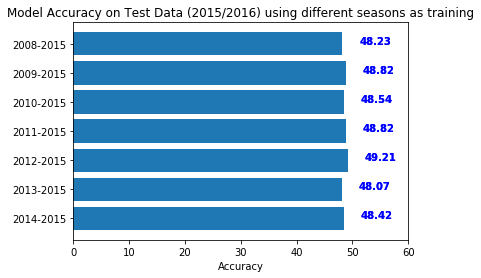

In [36]:
## plot the accuracy for the different scenarios above
import matplotlib.pyplot as plt

objects = ('2014-2015', '2013-2015', '2012-2015', '2011-2015', '2010-2015', '2009-2015','2008-2015')
y_pos = np.arange(len(objects))
r=[]
for i in range(len(results_saved)):
    r.append(results_saved[i]['acc_test']*100)
#display(r)
plt.barh(y_pos, r, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Model Accuracy on Test Data (2015/2016) using different seasons as training')
plt.xlim((0,60))

for i, v in enumerate(r):
    plt.text(v + 3, i, str('%.2f' %v), color='blue', fontweight='bold')

plt.show()

#### Let's try tuning the model on the training dataset that includes seasons 2012-2015

In [4]:
seasons_to_use=['2014/2015', '2013/2014', '2012/2013']
train_data=train_data[train_data['season'].isin(seasons_to_use)]
display('Size of training dataset: ', train_data.shape[0])
X_train=train_data.drop(['season','Label'],axis=1)
Y_train=train_data['Label']

X_test=test_data.drop(['season','Label'],axis=1)
Y_test=test_data['Label']

'Size of training dataset: '

7303

In [43]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'learning_rate': [i/10000.0 for i in range(44,50,1)]
}
gsearch1 = GridSearchCV(estimator = clf_3, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52650, std: 0.00673, params: {'learning_rate': 0.0044},
  mean: 0.52704, std: 0.00654, params: {'learning_rate': 0.0045},
  mean: 0.52691, std: 0.00540, params: {'learning_rate': 0.0046},
  mean: 0.52581, std: 0.00537, params: {'learning_rate': 0.0047},
  mean: 0.51390, std: 0.01327, params: {'learning_rate': 0.0048},
  mean: 0.51404, std: 0.01389, params: {'learning_rate': 0.0049}],
 {'learning_rate': 0.0045},
 0.52704364722685704)

In [47]:
clf_2 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1000, random_state = 1,learning_rate=0.0045)
param_test1 = {
    'n_estimators': [i for i in range(1300,1400,10)]
}
gsearch1 = GridSearchCV(estimator = clf_2, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52636, std: 0.00520, params: {'n_estimators': 1300},
  mean: 0.52650, std: 0.00540, params: {'n_estimators': 1310},
  mean: 0.52718, std: 0.00553, params: {'n_estimators': 1320},
  mean: 0.52691, std: 0.00573, params: {'n_estimators': 1330},
  mean: 0.51856, std: 0.00878, params: {'n_estimators': 1340},
  mean: 0.51828, std: 0.00914, params: {'n_estimators': 1350},
  mean: 0.51774, std: 0.00886, params: {'n_estimators': 1360},
  mean: 0.51746, std: 0.00923, params: {'n_estimators': 1370},
  mean: 0.51787, std: 0.00868, params: {'n_estimators': 1380},
  mean: 0.51842, std: 0.00850, params: {'n_estimators': 1390}],
 {'n_estimators': 1320},
 0.52718065229604461)

In [48]:
clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1320, random_state = 1,learning_rate=0.0045)

results = train_predict(clf_3, X_train, Y_train, X_test, Y_test)

AdaBoostClassifier trained.


In [49]:
results

{'acc_test': 0.48462145110410093,
 'acc_train': 0.50666666666666671,
 'f_test': 0.48462145110410093,
 'f_train': 0.50666666666666671,
 'train_time': 28.88394808769226}

### Let's add a scaler and see if it improves the accuracy

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pipeline6 = Pipeline([
        ('min/max scaler', StandardScaler()),
        ('model',  AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1320, random_state = 1,learning_rate=0.0045))])
    
result= train_predict(pipeline6, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [14]:
result

{'acc_test': 0.48462145110410093,
 'acc_train': 0.50666666666666671,
 'f_test': 0.48462145110410093,
 'f_train': 0.50666666666666671,
 'train_time': 30.50456142425537}

### Let's add PCA

In [17]:
from sklearn.decomposition import PCA

pipeline_PCA = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('pca', PCA()),
        ('model',  AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1320, random_state = 1,learning_rate=0.0045))])



result= train_predict(pipeline_PCA, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [18]:
result

{'acc_test': 0.47910094637223977,
 'acc_train': 0.52333333333333332,
 'f_test': 0.47910094637223977,
 'f_train': 0.52333333333333332,
 'train_time': 67.7461998462677}

In [22]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'model__learning_rate': [i/10000.0 for i in range(90,200,10)]
}
gsearch1 = GridSearchCV(estimator = pipeline_PCA, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52992, std: 0.00700, params: {'model__learning_rate': 0.009},
  mean: 0.52979, std: 0.00790, params: {'model__learning_rate': 0.01},
  mean: 0.52937, std: 0.00757, params: {'model__learning_rate': 0.011},
  mean: 0.52855, std: 0.00875, params: {'model__learning_rate': 0.012},
  mean: 0.52787, std: 0.00902, params: {'model__learning_rate': 0.013},
  mean: 0.52814, std: 0.01001, params: {'model__learning_rate': 0.014},
  mean: 0.52691, std: 0.01044, params: {'model__learning_rate': 0.015},
  mean: 0.52732, std: 0.01057, params: {'model__learning_rate': 0.016},
  mean: 0.52691, std: 0.00992, params: {'model__learning_rate': 0.017},
  mean: 0.52691, std: 0.00936, params: {'model__learning_rate': 0.018},
  mean: 0.52691, std: 0.00991, params: {'model__learning_rate': 0.019}],
 {'model__learning_rate': 0.009},
 0.52992176644827438)

In [24]:
pipeline_PCA = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('pca', PCA()),
        ('model',  AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1320, random_state = 1,learning_rate=0.009))])

param_test1 = {
    'model__n_estimators': [i for i in range(1300,1400,10)]
}
gsearch1 = GridSearchCV(estimator = pipeline_PCA, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52965, std: 0.00743, params: {'model__n_estimators': 1300},
  mean: 0.52978, std: 0.00715, params: {'model__n_estimators': 1310},
  mean: 0.52992, std: 0.00700, params: {'model__n_estimators': 1320},
  mean: 0.52992, std: 0.00733, params: {'model__n_estimators': 1330},
  mean: 0.52965, std: 0.00741, params: {'model__n_estimators': 1340},
  mean: 0.53006, std: 0.00732, params: {'model__n_estimators': 1350},
  mean: 0.53006, std: 0.00724, params: {'model__n_estimators': 1360},
  mean: 0.53006, std: 0.00724, params: {'model__n_estimators': 1370},
  mean: 0.53033, std: 0.00730, params: {'model__n_estimators': 1380},
  mean: 0.53020, std: 0.00680, params: {'model__n_estimators': 1390}],
 {'model__n_estimators': 1380},
 0.53033278165583708)

In [29]:
pipeline_PCA = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('pca', PCA()),
        ('model',  AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1380, random_state = 1,learning_rate=0.009))])

results = train_predict(pipeline_PCA, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [30]:
results

{'acc_test': 0.4834384858044164,
 'acc_train': 0.53666666666666663,
 'f_test': 0.4834384858044164,
 'f_train': 0.53666666666666663,
 'train_time': 62.3051016330719}

### Let's try a DecisionTreeClassifier with depth 2

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('model',  AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME.R",
                         n_estimators=1380, random_state = 1,learning_rate=0.009))])

results = train_predict(pipeline, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [9]:
results

{'acc_test': 0.49053627760252366,
 'acc_train': 0.55333333333333334,
 'f_test': 0.49053627760252366,
 'f_train': 0.55333333333333334,
 'train_time': 57.51421856880188}

#### Let's tune

In [11]:
from sklearn.model_selection import GridSearchCV


param_test1 = {
    'model__learning_rate': [i/10000.0 for i in range(11,30,2)]
}
gsearch1 = GridSearchCV(estimator = pipeline, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.52924, std: 0.00456, params: {'model__learning_rate': 0.0011},
  mean: 0.53198, std: 0.00675, params: {'model__learning_rate': 0.0013},
  mean: 0.53239, std: 0.00572, params: {'model__learning_rate': 0.0015},
  mean: 0.53252, std: 0.00655, params: {'model__learning_rate': 0.0017},
  mean: 0.53334, std: 0.00555, params: {'model__learning_rate': 0.0019},
  mean: 0.51678, std: 0.02732, params: {'model__learning_rate': 0.0021},
  mean: 0.50514, std: 0.04240, params: {'model__learning_rate': 0.0023},
  mean: 0.48352, std: 0.07169, params: {'model__learning_rate': 0.0025},
  mean: 0.46914, std: 0.09020, params: {'model__learning_rate': 0.0027},
  mean: 0.46161, std: 0.09967, params: {'model__learning_rate': 0.0029}],
 {'model__learning_rate': 0.0019},
 0.53334430499185137)

In [13]:
pipeline = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('model',  AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME.R",
                         n_estimators=1380, random_state = 1,learning_rate=0.0019))])
param_test1 = {
    'model__n_estimators': [i for i in range(1400,1500,10)]
}
gsearch1 = GridSearchCV(estimator = pipeline, param_grid = param_test1, scoring='accuracy',n_jobs=4,iid=False)

gsearch1.fit(X_train,Y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



D:\Users\karel\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.53389, std: 0.00555, params: {'model__n_estimators': 1400},
  mean: 0.53033, std: 0.00730, params: {'model__n_estimators': 1410},
  mean: 0.53047, std: 0.00700, params: {'model__n_estimators': 1420},
  mean: 0.52212, std: 0.01773, params: {'model__n_estimators': 1430},
  mean: 0.52226, std: 0.01722, params: {'model__n_estimators': 1440},
  mean: 0.52335, std: 0.01695, params: {'model__n_estimators': 1450},
  mean: 0.51678, std: 0.02561, params: {'model__n_estimators': 1460},
  mean: 0.51719, std: 0.02593, params: {'model__n_estimators': 1470},
  mean: 0.51637, std: 0.02726, params: {'model__n_estimators': 1480},
  mean: 0.51664, std: 0.02714, params: {'model__n_estimators': 1490}],
 {'model__n_estimators': 1400},
 0.53389210020893973)

In [18]:
pipeline = Pipeline([
        ('min/max scaler', MinMaxScaler(feature_range=(0.0, 1.0))),
        ('model',  AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME.R",
                         n_estimators=1400, random_state = 1,learning_rate=0.0019))])

results = train_predict(pipeline, X_train, Y_train, X_test, Y_test)

Pipeline trained.


In [19]:
results

{'acc_test': 0.48698738170347006,
 'acc_train': 0.51333333333333331,
 'f_test': 0.48698738170347006,
 'f_train': 0.51333333333333331,
 'train_time': 57.10399866104126}

## Let's try predicting another season (season 14/15) and training on the corresponding previous seasons

In [20]:
final_dataset = pd.read_csv('FINAL_BASE_DATASET_WITH_BETS_ZEROS_REMOVED_WITH_SEASON.csv',index_col=0)

## Extract season 2015/2016 matches as test data
this_season='2015/2016'
final_dataset=final_dataset.drop(final_dataset[final_dataset['season']==this_season].index)

test_season='2014/2015'
test_data=final_dataset[final_dataset['season']==test_season]

train_data=final_dataset.drop(test_data.index)

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier


clf_3 = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME.R",
                         n_estimators=1270, random_state = 1,learning_rate=0.036)

seasons_to_use=[]
seasons_used=[]
results_saved=[]
count=0
for season in np.flip(np.sort(train_data['season'].unique()),axis=0):
    seasons_to_use.append(season)
    print('Using seasons: ', seasons_to_use)
    result=train_test_dynamically_adding_seasons(clf_3,train_data,test_data,seasons_to_use)
    results_saved.append(result)
    print(result)
    print('........................................')
    #seasons_used[count].append[seasons_to_use]
    count=count+1

Using seasons:  ['2013/2014']


'Size of training dataset: '

2019

AdaBoostClassifier trained.
{'train_time': 8.616507768630981, 'acc_train': 0.64333333333333331, 'acc_test': 0.51883561643835618, 'f_train': 0.64333333333333331, 'f_test': 0.51883561643835618}
........................................
Using seasons:  ['2013/2014', '2012/2013']


'Size of training dataset: '

4226

AdaBoostClassifier trained.
{'train_time': 17.68287992477417, 'acc_train': 0.51333333333333331, 'acc_test': 0.52696917808219179, 'f_train': 0.51333333333333331, 'f_test': 0.52696917808219179}
........................................
Using seasons:  ['2013/2014', '2012/2013', '2011/2012']


'Size of training dataset: '

6313

AdaBoostClassifier trained.
{'train_time': 24.10475182533264, 'acc_train': 0.55333333333333334, 'acc_test': 0.52696917808219179, 'f_train': 0.55333333333333334, 'f_test': 0.52696917808219179}
........................................
Using seasons:  ['2013/2014', '2012/2013', '2011/2012', '2010/2011']


'Size of training dataset: '

8132

AdaBoostClassifier trained.
{'train_time': 30.826406955718994, 'acc_train': 0.54000000000000004, 'acc_test': 0.5235445205479452, 'f_train': 0.54000000000000004, 'f_test': 0.5235445205479452}
........................................
Using seasons:  ['2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010']


'Size of training dataset: '

9853

AdaBoostClassifier trained.
{'train_time': 37.855671882629395, 'acc_train': 0.54333333333333333, 'acc_test': 0.52525684931506844, 'f_train': 0.54333333333333333, 'f_test': 0.52525684931506844}
........................................
Using seasons:  ['2013/2014', '2012/2013', '2011/2012', '2010/2011', '2009/2010', '2008/2009']


'Size of training dataset: '

11225

AdaBoostClassifier trained.
{'train_time': 42.56881928443909, 'acc_train': 0.54666666666666663, 'acc_test': 0.52482876712328763, 'f_train': 0.54666666666666663, 'f_test': 0.52482876712328763}
........................................


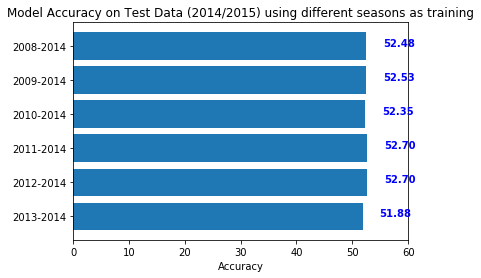

In [24]:
## plot the accuracy for the different scenarios above
import matplotlib.pyplot as plt

objects = ('2013-2014', '2012-2014', '2011-2014', '2010-2014', '2009-2014', '2008-2014')
y_pos = np.arange(len(objects))
r=[]
for i in range(len(results_saved)):
    r.append(results_saved[i]['acc_test']*100)
#display(r)
plt.barh(y_pos, r, align='center')
plt.yticks(y_pos, objects)
plt.xlabel('Accuracy')
plt.title('Model Accuracy on Test Data (2014/2015) using different seasons as training')
plt.xlim((0,60))

for i, v in enumerate(r):
    plt.text(v + 3, i, str('%.2f' %v), color='blue', fontweight='bold')
    
plt.show()


#### Checking if it's overfitting!

In [28]:
from sklearn.model_selection import cross_val_score

seasons_to_use=['2013/2014', '2012/2013']
train_data=train_data[train_data['season'].isin(seasons_to_use)]
display('Size of training dataset: ', train_data.shape[0])
X_train=train_data.drop(['season','Label'],axis=1)
Y_train=train_data['Label']

scores=cross_val_score(clf_3, X_train, Y_train, cv=5)
display(scores)

pred=clf_3.predict(X_train)
accuracy_score(Y_train,pred)

'Size of training dataset: '

4226

array([ 0.30106257,  0.52071006,  0.50414201,  0.55029586,  0.53436019])

0.54874585896829153